# Project: Investigate a Dataset - [San Francisco Building Permits]

[Data Source](https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values/data)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this section, we will be attempting to answer the following questions regarding the dataset:

1. How many permits were completed over a 5.5 year (Jan'13 to Feb'18) timeframe?
2. How many new permits were created over a 5.5 year (Jan'13 to Feb'18) timeframe?
3. Which was the top 5 and bottom 5 neighbourhood in terms of permits completion over the 5.5 years?
4. Is there a correlation between building height and cost?
5. What is the distribution of permit types?


In [25]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
pd.options.display.max_rows = 99999

# set seed for reproducibility
np.random.seed(5)

In [26]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## 1.0 Data Wrangling

In [27]:
# Loading data from csv
permits = pd.read_csv('Building_Permits.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.1 Quick view of the data

Taking a sample of the dataset to get a sense of what we are dealing with. Immediately we can already identify several characteristics regarding the dataset.
1. Missing data in several columns (NaN)
2. Different data types (e.g, text, int, float)

In [28]:
permits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
151545,M766848,8,otc alterations permit,03/08/2017,3522,116,9,NaN,Bernice,St,...,NaN,NaN,NaN,NaN,NaN,6.0,Mission,94103.0,"(37.770077763447624, -122.4136596972044)",1455522496274
150178,M762447,8,otc alterations permit,02/21/2017,3970,005,405,NaN,Florida,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1453803387644
92253,201507161644,3,additions alterations or repairs,07/16/2015,0670,011,1238,NaN,Sutter,St,...,5.0,wood frame (5),1.0,constr type 1,Y,3.0,Nob Hill,94109.0,"(37.78792924558961, -122.42082396956111)",138862678404
138765,201610049499,8,otc alterations permit,10/04/2016,2024,026,1830,NaN,Noriega,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.75418962721657, -122.48354739733213)",1439802122367
41640,M470307,8,otc alterations permit,03/12/2014,0529,018C,2844,NaN,Octavia,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Marina,94123.0,"(37.798627186201266, -122.42879501502117)",133522773192


## 1.2 High level summary
We are going to use build a function to further explore the dataset:
1. count() - to look at the number of null rows/columns
2. dtypes - to understand the data types we are dealing with
3. nunique() - identify duplicates in the dataset
4. isnull() - number of rows that are null/missing

In [29]:
def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the data type, # of null rows and unique rows of a given dataframe
    
    Args: 
        A dataframe of n_rows and n_columns
    Returns:
        A dataframe of 4 columns [data_type, non-null-rows, unique_rows, missing_rows]
    """
    concat = pd.concat(
        [df.dtypes.to_frame(), df.count().to_frame(), df.nunique(), df.isnull().sum()], axis=1
    )
    concat.columns = ['data_type', 'non-null-rows', 'unique_rows', 'missing_rows']
    return concat

permits_summary = summary(permits)
permits_summary

,data_type,non-null-rows,unique_rows,missing_rows
Permit Number,object,198900,181495,0
Permit Type,int64,198900,8,0
Permit Type Definition,object,198900,8,0
Permit Creation Date,object,198900,1291,0
Block,object,198900,4896,0
Lot,object,198900,1055,0
Street Number,int64,198900,5099,0
Street Number Suffix,object,2216,18,196684
Street Name,object,198900,1704,0
Street Suffix,object,196132,21,2768


From the output, we can observe several issues with the dataset.
1. Duplicates in some columns where duplicates are not supposed to happen (e.g., Permit Number) which should be a unique value
2. Missing values (e.g., Zipcode, location) 


## 2.0 Data Wrangling
In this section, we will perform the follow tasks:
1. More granular + defined data exploration
2. Data cleaning
3. Data structuring/transformation

## 2.1 Verifying the data

As observed in the initiatial summary, there seems to be duplicates in the dataset, we will attempt to identify if it was an unintended duplicate which needs to be removed.

In [30]:
# We are pulling for duplicates in permit number to verify if the duplicated permit numbers are actually meant to be there
# show first 5 rows in the dataset with duplicates
permits[permits.duplicated(subset=['Permit Number'])].head(5)
# Pulling an example of permit number that is duplicated to see if the duplicate is warranted
permits[permits['Permit Number'] == '201301027095']

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
560,201301027095,8,otc alterations permit,01/02/2013,3564,045,60,NaN,Prosper,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94114.0,"(37.76331368403074, -122.43177542013316)",1292189158843
567,201301027095,8,otc alterations permit,01/02/2013,3564,045,62,NaN,Prosper,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94114.0,"(37.76331368403074, -122.43177542013316)",1292196489427


In this permit example, it seems like all columns are duplicated except for street number which does not make sense. Now, we will remove duplicated permit numbers.

## 2.2 Data Cleaning
For this section, we will attempt to clean up the dataset based on some of the issues that were discovered in the previous section. The following steps will be taken:
1. Removing duplicates
2. Handling missing values

In [31]:
# removing duplicated permit numbers
permits_cleaned = permits.drop_duplicates(subset='Permit Number')
# removing missing rows with missing zipcode/location information
permits_cleaned = permits_cleaned.dropna(subset=['Location', 'Zipcode'])

In [32]:
# reviewing dataset after we have handled the data issues
summary(permits_cleaned)

,data_type,non-null-rows,unique_rows,missing_rows
Permit Number,object,179888,179888,0
Permit Type,int64,179888,8,0
Permit Type Definition,object,179888,8,0
Permit Creation Date,object,179888,1291,0
Block,object,179888,4875,0
Lot,object,179888,1030,0
Street Number,int64,179888,5001,0
Street Number Suffix,object,1518,15,178370
Street Name,object,179888,1698,0
Street Suffix,object,177277,21,2611


As observed, the dataset size reduced. This is due to the removal of rows with duplicated permit numbers and missing location + zipcode data.

<a id='eda'></a>
## 3.0 Exploratory Data Analysis


## Research Question 1: How many permits were completed over a 5.5 year (Jan'13 to Feb'18) timeframe?
For this question, we are attempting to visualize the proportion of completed permits by month over the years

In [33]:
# first, we filter out only the relevant columns for our research
completed_permits = (
    permits_cleaned[['Permit Number', 'Current Status', 'Completed Date']]
)

# taking a quick 5 sample peek on the latest data subset
completed_permits = completed_permits.dropna()
completed_permits.sample(5)

,Permit Number,Current Status,Completed Date
140836,201610261230,complete,11/22/2016
5963,201303051493,complete,09/18/2013
121390,201604195164,complete,06/16/2016
117338,201603141876,complete,06/27/2016
76775,201502239093,complete,06/11/2015


As observed, there seems to quite a few rows with 'NaN' as Completed Date. For this, we will remove them as they are not relevant to our first analysis

In [34]:
completed_permits['Current Status'].value_counts()

complete      88153
issued           43
reinstated       32
expired           7
cancelled         5
revoked           4
approved          4
suspend           3
incomplete        1
Name: Current Status, dtype: int64

A quick breakdown of the current status column shows that there are several different status for permits. We will only preserve the permits with completed status.

In [35]:
# filter only for completed permits
completed_permits = (
    completed_permits[completed_permits['Current Status']=='complete']
)

completed_permits['Current Status'].value_counts()

complete    88153
Name: Current Status, dtype: int64

In [36]:
completed_permits['Completed Date'] = pd.to_datetime(completed_permits['Completed Date'])

# create 2 columns (year and month) based on the complete datetime columns
# then we drop the completed date column as it is no longer necessary
completed_permits = (
    completed_permits
    .assign(year=lambda x: x['Completed Date'].dt.year)
    .assign(month=lambda x: x['Completed Date'].dt.month)
).drop(columns='Completed Date')

completed_permits.sample(5)

,Permit Number,Current Status,year,month
72624,201501135673,complete,2016,9
177189,201706149299,complete,2017,9
93183,201507242384,complete,2015,9
167413,201706139276,complete,2017,8
14162,201305308261,complete,2013,8


Now that we have filtered only for completed permits and removed any issues with the dataset, we transform the date field into 'year' and 'month' to build a stacked bar chart for visualization.

We will also be aggregating the total number of permits per Year-Month pair.

In [37]:
completed_permits = (
    completed_permits
    .groupby(['year', 'month'])['Permit Number']
    .count()
    .reset_index()
)

completed_permits.head()

,year,month,Permit Number
0,2013,1,160
1,2013,2,390
2,2013,3,594
3,2013,4,754
4,2013,5,911


Finally, we will be converting the data into a pivot like table so that we can built a stacked bar chart.

### Define default chart size for all visualizations

In [1]:
# define the default chart size for all our visualizations
plt.rcParams["figure.figsize"] = (8,6)

NameError: name 'plt' is not defined

In [39]:
# building a pivot of completed permits by year
pivot_permits = (
    completed_permits.pivot(index='year', columns='month', values='Permit Number')
)

pivot_permits

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,160.0,390.0,594.0,754.0,911.0,877.0,1110.0,1157.0,1035.0,1581.0,1124.0,1282.0
2014,1399.0,1163.0,1330.0,1483.0,1539.0,1414.0,1394.0,1448.0,1446.0,1609.0,1356.0,1460.0
2015,1388.0,1453.0,1583.0,1485.0,1476.0,1582.0,1607.0,1464.0,1343.0,1674.0,1454.0,1710.0
2016,1437.0,1567.0,1815.0,1672.0,1693.0,1738.0,1573.0,1758.0,1493.0,1652.0,1767.0,1628.0
2017,1336.0,1415.0,1870.0,1498.0,1683.0,1608.0,1425.0,1732.0,1572.0,1936.0,1547.0,1613.0
2018,1641.0,1249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'Year')

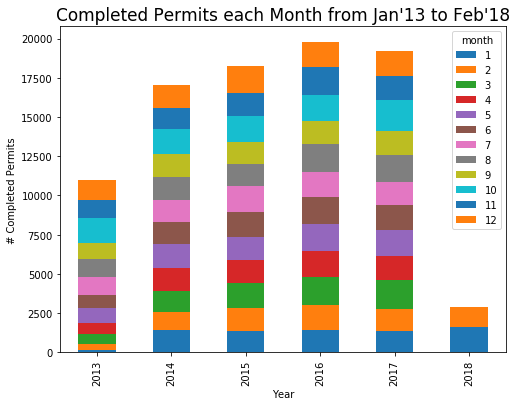

In [40]:
# visualizing the pivot in a chart
stacked_permits = (
    pivot_permits.loc[:,[1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
    .plot
    .bar(stacked=True)
)

# naming the stacked bar chart
stacked_permits.set_title("Completed Permits each Month from Jan'13 to Feb'18", fontsize=17)
# adding x-axis labels
stacked_permits.set_ylabel('# Completed Permits')
# adding y-axis labels
stacked_permits.set_xlabel('Year')

## Summary of Analysis for Q1

In this reseaerch question, we looked at the total number of permits that were completed each month over the course of 6 years. With a stacked bar chart, we are able to see the proportion of completed permits relative to the corresponding year rather clearly. In general, the number of completed permits seems to have increased over the years, even more significantly in the first year (2013) before slightly tapering off and eventually seeing a slight dip in 2017. 

## Limitations
However that are several limitations in this analysis
1. This way of presentation makes it difficult for us do a year-on-year comparison (e.g, December 2014 vs December 2015) as the height of the charts are not aligned. 
2. We did not attempt to understand the cause for the dip in 2017 (i.e, which months were driving the decrease) and which are the permit types and/or neighbourhoods that were responsible for the decrease.
3. We should remove year 2018 for comparison as the data points are insufficient to do a proper full year-on-year analysis against the previous years. 

## Research Question 2: How many new permits were created over a 5.5 year (Jan'13 to Feb'18) timeframe?
- We can attempt to identify or spot any trends/seasonality in permits creation month-over-month over our defined timeframe

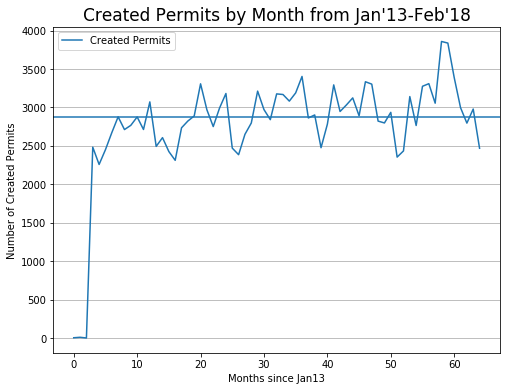

In [52]:
permits_cleaned['Permit Creation Date'] = pd.to_datetime(permits['Permit Creation Date'])
permits_cleaned = (
    permits_cleaned
    .assign(year=lambda x: x['Permit Creation Date'].dt.year)
    .assign(month=lambda x: x['Permit Creation Date'].dt.month)
)

permits_by_timeframe = (
    permits_cleaned
    .groupby(['year','month'])['Permit Number'].count()
    .reset_index()
)

l = []
l.extend(range(0, 65))
permits_line_chart = {'M': l, 'Created Permits': permits_by_timeframe['Permit Number']}
permits_line_chart = pd.DataFrame(permits_line_chart)
permits_line_chart

line_chart = permits_line_chart.plot(kind='line', x='M', y='Created Permits')
avg_permits = permits_line_chart['Created Permits'].median()
line_chart.axhline(avg_permits)

# naming the line chart
line_chart.set_title("Created Permits by Month from Jan'13-Feb'18", fontsize=17)
# adding y-axis labels
line_chart.set_ylabel('Number of Created Permits')
# adding x-axis labels
line_chart.set_xlabel('Months since Jan13')
# adding gridlines on the y-axis
plt.grid(axis='y')

## Summary of Analysis for Q2

We can see that the number of permits created increased steadily over the months (and years) with certain peaks in certain months which may look like seasonality is in play here. However, more investigation will have to be conducted before we can verify this claim.


## Research Question 3: Which was the top 5 and bottom 5 neighbourhood in terms of permits completion over the 5.5 years?

In [42]:
permits.rename(columns={'Neighborhoods - Analysis Boundaries': "neighbourhood"}, inplace=True)

In [43]:
permits['building_progress'] = (
    np.where(permits['Number of Proposed Stories'].isnull(), 'Not Started',
    np.where(permits['Number of Proposed Stories']<permits['Number of Existing Stories'], 'In Progress', 'Completed'
        ))
)
    
# permits_completion = permits[permits['year'] == 2017]
neighbourhood_completion = (
    permits.groupby(['neighbourhood'])['building_progress']
    .value_counts()
    .to_frame()
    .unstack()
    .fillna(0)
)
# neighbourhood_completion
neighbourhood_completion.columns = neighbourhood_completion.columns.droplevel(level=0)
neighbourhood_completion = neighbourhood_completion.sort_values(by='Completed', ascending=False)

In [44]:
neighbourhood_completion.head(5).append(neighbourhood_completion.tail(5))

building_progress,Completed,In Progress,Not Started
neighbourhood,,,
Financial District/South Beach,19280.0,9.0,2527.0
Mission,10906.0,3.0,3772.0
Sunset/Parkside,8963.0,2.0,1242.0
West of Twin Peaks,7595.0,2.0,1142.0
Castro/Upper Market,6411.0,2.0,2114.0
Treasure Island,65.0,0.0,16.0
Golden Gate Park,56.0,0.0,8.0
Lincoln Park,39.0,0.0,10.0
McLaren Park,36.0,0.0,10.0


We can see that the financial district/south beach had the most permit completions while Presidio had the least. 
Interestingly, the number of permits that has not yet started - meaning in the pipeline - were also comparatively higher than the bottom 5.

## Research Question 4: Is there a correlation between building height and cost?
In this research question, we attempt to identify if building height is related to estimated cost. Intuitively, it should be positively correlated as more variable costs will be involved for a higher building. 

We will attempt to uncover this via a scatterplot

In [45]:
# first, we filter out the relevant variables
building_cost = permits_cleaned[['Number of Proposed Stories', 'Estimated Cost']]
# using the summary function that we previously created, we determine if the data needs cleaning
summary(building_cost)

# seems like there are some missing data which we will go ahead and remove

,data_type,non-null-rows,unique_rows,missing_rows
Number of Proposed Stories,float64,140658,63,39230
Estimated Cost,float64,145263,11331,34625


In [46]:
building_cost.dropna(subset=['Number of Proposed Stories','Estimated Cost'], inplace=True)
summary(building_cost)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,data_type,non-null-rows,unique_rows,missing_rows
Number of Proposed Stories,float64,140512,63,0
Estimated Cost,float64,140512,11166,0


Now that we have removed the rows with missing data, we can go ahead and build our chart.

Text(0.5,0,'Proposed Building Stories')

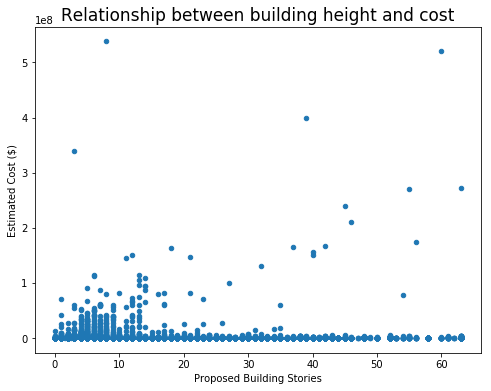

In [47]:
building_scatter = building_cost.plot(kind='scatter', x='Number of Proposed Stories', y='Estimated Cost')
# naming the line chart
building_scatter.set_title("Relationship between building height and cost", fontsize=17)
# adding y-axis labels
building_scatter.set_ylabel('Estimated Cost ($)')
# adding x-axis labels
building_scatter.set_xlabel('Proposed Building Stories')

## Summary of Analysis for Q4

The scatterplot is able to show the relationship between two variables "Estimated cost ($)" and "Proposed Building Stories". Based purely off observations from the chart, there seems to be a weak correlation between cost and building height as we can observe that there are a significant number of data points close to the bottom of the y-axis. 

However, there are a few outliers on higher end of the cost spectrum. 

## Limitations
This plot will only allow us to make very superficial observations. As correlation does not equate to causation, there is a possibility that the characteristics we are observing from this plot might be due to another confounding variable(s). To verify this, we will have to perform more detailed analyses.

## Research Question 5: What is the distribution of all permit types created?  (Univariate Visualization)

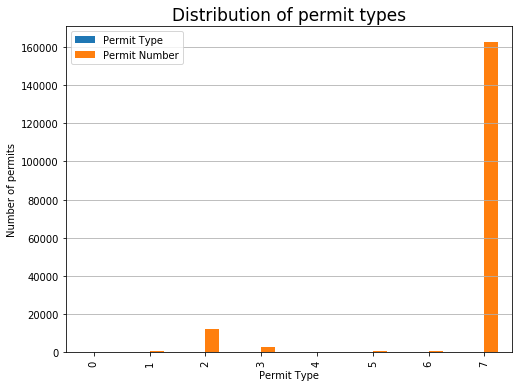

In [59]:
# Grouping of permits by type
permit_type = (
    permits_cleaned
    .groupby(['Permit Type'])['Permit Number']
    .count()
    .reset_index()
)

permit_chart = permit_type.plot.bar()

# naming the line chart
permit_chart.set_title("Distribution of permit types", fontsize=17)
# adding y-axis labels
permit_chart.set_ylabel('Number of permits')
# adding x-axis labels
permit_chart.set_xlabel('Permit Type')
# adding gridlines on the y-axis
plt.grid(axis='y')

In [60]:
permits_cleaned['Permit Type Definition'].unique()

array(['sign - erect', 'additions alterations or repairs',
       'otc alterations permit', 'demolitions', 'wall or painted sign',
       'new construction', 'grade or quarry or fill or excavate',
       'new construction wood frame'], dtype=object)

From the chart, it is rather obvious that permit 7 has the most, followed by permit 2 and 3 respectively.

## Summary of findings

As discussed previously, these analyses were meant to be exploratory in nature to provide us with a quick, but data driven approach when investigating a dataset. 

Our work was aimed at answering 4 questions:
1. How many permits were completed over a 5.5 year (Jan'13 to Feb'18) timeframe?
2. How many new permits were created over a 5.5 year (Jan'13 to Feb'18) timeframe?
3. Which was the top 5 and bottom 5 neighbourhood in terms of permits completion over the 5.5 years?
4. Is there a correlation between building height and cost?
5. What is the distribution of permit types?

However, it does not involve the use of any inferential statistics and/or machine learning algorithms (Linear regression etc, LDA). As we progress further in this course, we will apply more advanced techniques to slice and dice a dataset.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])